In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import chess
import data_transform
import gc

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# load model
import pickle
with open('./data/logreg_supervised_linear_no_reg.pickle', 'rb') as f:
    logreg = pickle.load(f)

In [4]:
PIECES_NAMES = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen', 'King']

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.06835251  0.08748516  0.0654864   0.05819543
  0.05624776  0.07317299  0.09274803  0.07794908  0.084254    0.08880541
  0.0815741   0.08788521  0.08200451  0.08311958  0.09169833  0.08220571
  0.08287001  0.08210248  0.08501497  0.09297303  0.09426179  0.08627669
  0.08154801  0.08547493  0.08858664  0.08336365  0.08499705  0.09392247
  0.09120286  0.08391821  0.08415271  0.086911    0.08554266  0.09496405
  0.0790331   0.07957     0.08565417  0.07804009  0.09152991  0.08847121
  0.08399177  0.09762897  0.0754714   0.05013532  0.05209473  0.06783293
  0.09301188  0.07507745  0.          0.          0.          0.
  0.          0.          0.          0.          0.08569562  0.10512311
  0.1075873   0.10959267  0.10487829  0.09921983  0.10052153  0.06546749
  0.10735186  0.12378168  0.16286336  0.14673945  0.14747912  0.16847756
  0.12077475  0.10531748  0.11920989  0.1626587   0.16275731  0.206

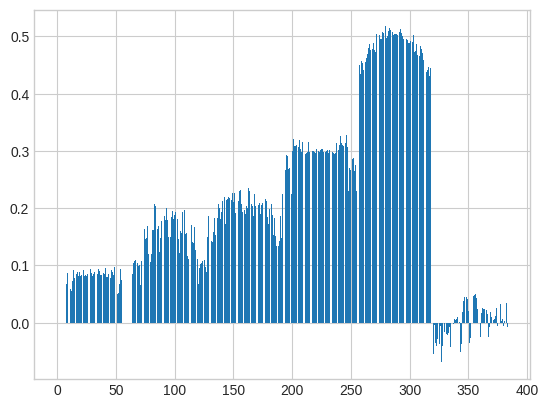

In [5]:
# display coefficients of logistic regression

# extract coefficients
coefficients = np.array(logreg.coef_)
print(coefficients)

# plot coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.show()

In [6]:
# get pieces values
# reshape coefficients to 2D array
avg_coefficients = coefficients.reshape(6, 8, 8)

# make average of all coefficients for each piece on possible squares
pieces_values = []
for i, piece_name in enumerate(PIECES_NAMES):
    coeff_array = avg_coefficients[i]
    if piece_name == 'Pawn':
        coeff_array = coeff_array[1 : 7]
    pieces_values.append(coeff_array.mean())
    

# normalize values to pawns at homerank
print(avg_coefficients[0][1:7])
pawn_value = avg_coefficients[0][1:7].mean()
pieces_values = [value / pawn_value for value in pieces_values]

for piece_name, pieces_value in zip(PIECES_NAMES, pieces_values):
    print(piece_name, pieces_value)

[[0.06835251 0.08748516 0.0654864  0.05819543 0.05624776 0.07317299
  0.09274803 0.07794908]
 [0.084254   0.08880541 0.0815741  0.08788521 0.08200451 0.08311958
  0.09169833 0.08220571]
 [0.08287001 0.08210248 0.08501497 0.09297303 0.09426179 0.08627669
  0.08154801 0.08547493]
 [0.08858664 0.08336365 0.08499705 0.09392247 0.09120286 0.08391821
  0.08415271 0.086911  ]
 [0.08554266 0.09496405 0.0790331  0.07957    0.08565417 0.07804009
  0.09152991 0.08847121]
 [0.08399177 0.09762897 0.0754714  0.05013532 0.05209473 0.06783293
  0.09301188 0.07507745]]
Pawn 1.0
Knight 1.7438878701743643
Bishop 2.355536140905189
Rook 3.599333806163754
Queen 5.896397705606567
King 4.549462427305191e-14


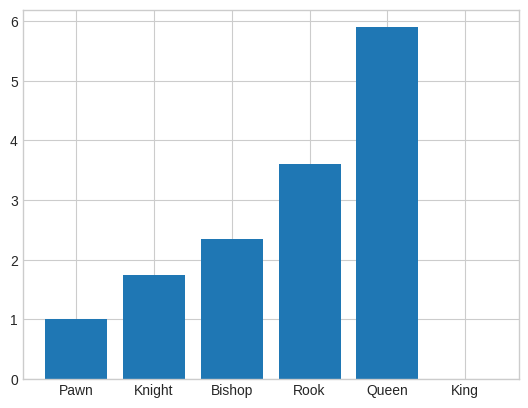

In [7]:
# plot graph of pieces values
plt.bar(range(len(pieces_values)), pieces_values)
plt.xticks(range(len(pieces_values)), PIECES_NAMES)
plt.show()

In [8]:
normalized_coefficients = avg_coefficients / pawn_value

In [9]:
def display_2d_array_as_heatmap(array, title):
    """displays 2d array as heatmap"""
    # round array
    array = np.round(array, 1)
    fig, ax = plt.subplots()
    im = ax.imshow(array)
    
    # set x and y ticks to chess coordinates
    x_labels = [chr(ord('A') + i) for i in range(len(array[0]))]
    y_labels = [str(i + 1) for i in reversed(range(len(array)))]
    ax.set_xticks(np.arange(len(array[0])))
    ax.set_yticks(np.arange(len(array)))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    
    # rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # add value annotations to each cell
    for i in range(len(array)):
        for j in range(len(array[0])):
            text = ax.text(j, i, array[i, j], ha="center", va="center", color="w")
    
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [10]:
# unuse seaborn style
plt.style.use('default')

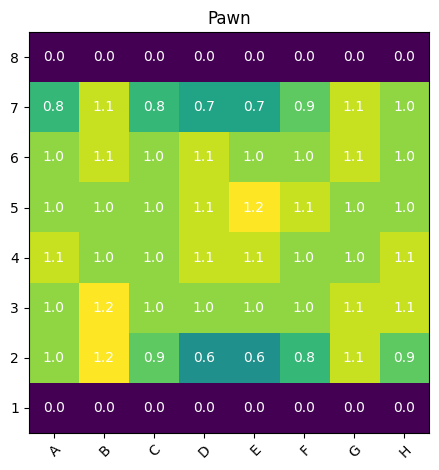

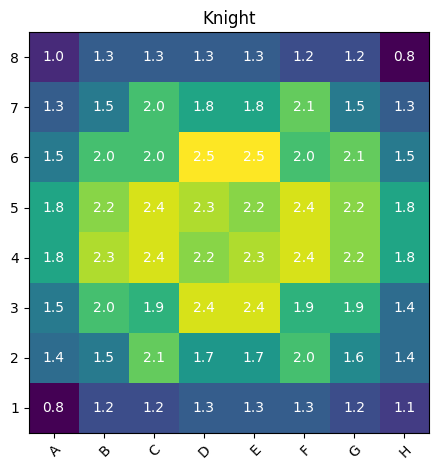

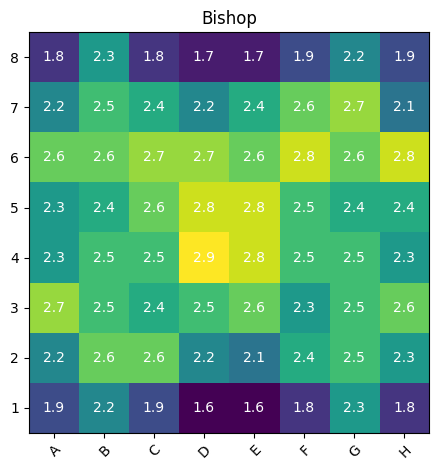

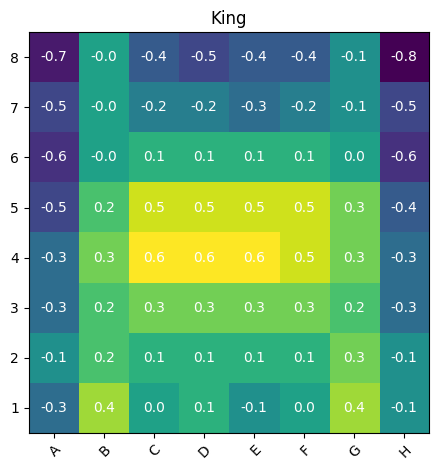

In [11]:
# display coefficients as heatmap
for i, piece_name in enumerate(PIECES_NAMES):
    display_2d_array_as_heatmap(normalized_coefficients[i], piece_name)